# Init ECG

In [59]:
import numpy as np
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as stats
import os

In [61]:
data_path_100 = 'data/physionet.org/files/ptb-xl/1.0.3/records100/00000/00001_lr'

# es werden gleichzeitig EKG Daten und Metadaten gelesen
X, meta = wfdb.rdsamp(data_path_100)

fs = meta['fs']
cols = meta['sig_name']
t = pd.to_timedelta(np.arange(X.shape[0]) / fs, unit="s")

df1 = pd.DataFrame(X, columns=cols, index=t)
df1.index.name = "time"

In [62]:
data_path_100 = 'data/physionet.org/files/ptb-xl/1.0.3/records100/21000/21656_lr'

# es werden gleichzeitig EKG Daten und Metadaten gelesen
X, meta = wfdb.rdsamp(data_path_100)

fs = meta['fs']
cols = meta['sig_name']
t = pd.to_timedelta(np.arange(X.shape[0]) / fs, unit="s")

df2 = pd.DataFrame(X, columns=cols, index=t)
df2.index.name = "time"

# Datenanalyse ECK Daten
- Struktur anschauen

In [63]:
df1.head()

,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
time,,,,,,,,,,,,
0 days 00:00:00,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
0 days 00:00:00.010000,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074
0 days 00:00:00.020000,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069
0 days 00:00:00.030000,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064
0 days 00:00:00.040000,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058


Die EKG-Ableitungen sind die Features in den EKG-Daten.
- Ableitung nach Einthoven (I, II, III)     https://flexikon.doccheck.com/de/Ableitung_nach_Einthoven
- Ableitung nach Goldberger (aVR, aVL, aVF) https://flexikon.doccheck.com/de/Ableitung_nach_Goldberger
- Ableitung nach Wilson (V1-V6)             https://flexikon.doccheck.com/de/Ableitung_nach_Wilson

https://flexikon.doccheck.com/de/Elektrokardiogramm

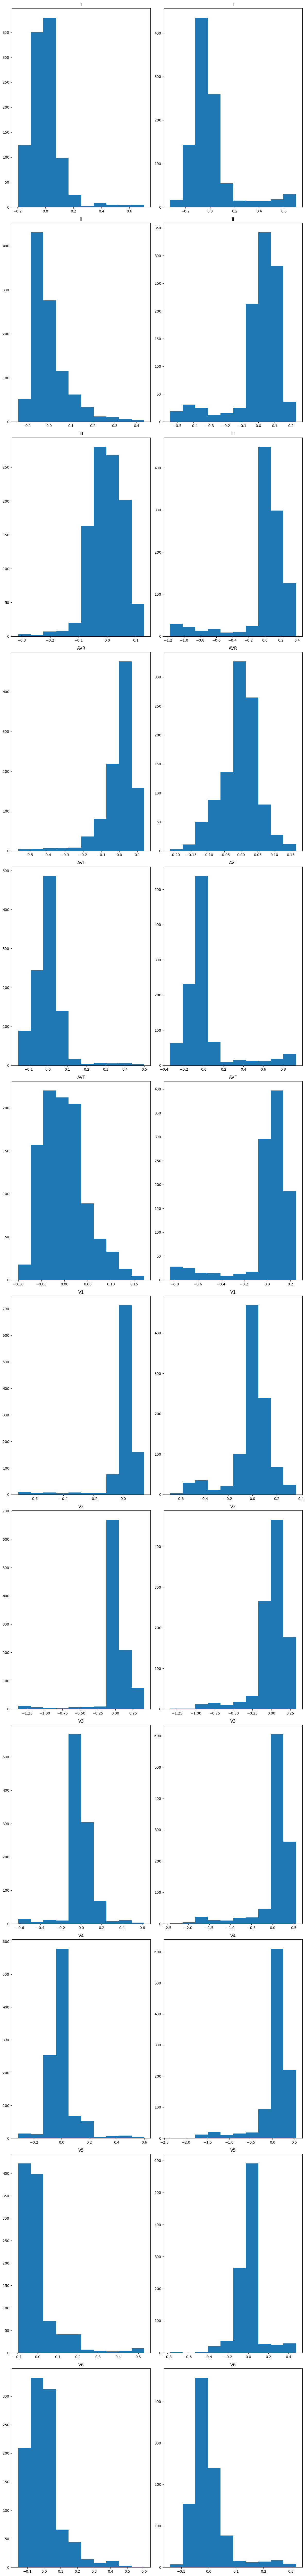

In [53]:
"""

Vergleich der Verteilungen zwischen 2 Personen


"""
fig, ax = plt.subplots(len(df1.columns), 2, figsize=(12, 100))

for i, col in enumerate(df1.columns):
    ax[i,0].hist(df1[col])
    ax[i,0].set_title(col)

for i, col in enumerate(df2.columns):
    ax[i,1].hist(df2[col])
    ax[i,1].set_title(col)

plt.tight_layout()
plt.show()